# Reproducing Watts and Strogatz ideas

We've all said at some point "it's such a small world!" when facing an unnexpected connection---a friend or a relative in common---with someone you just met. It just feels like an incredible coincidence! In their paper, Watts and Strogatzs try to quantify that.

The authors show that some networked systems showcase what they call "small-worlds" features. These involve a short path length and high clustering coefficient. In plain terms, what this means is that some systems have their components very well connected to their close neighbours while not too far from distant ones. If you got completely lost with the jargon of the paper, [Veritasium and Neil deGrasse Tyson](https://www.youtube.com/watch?v=TcxZSmzPw8k) have a nice video to illustrate the core idea.

Here, we will reproduce the main result from Watts and Strogatts. We will build a clustered network that we will progressively randomize to generate a gradient from "structured" to "randomized". Then, we will use network properties to show that there is a region in this gradient that shows "small-world" properties.

## Ring Lattice

Let's start by building the following network that the authors call "Ring Lattice" in the paper:

![](RingLattice.png)

In this network, everyone is connected to their nearest neighbours. Can you imagine how this would look like in the form of an adjacency matrix? In this case, the network has N=20 nodes, and K=4 edges or links per node.

<font color='green'>**Exercice 1:** Manually transform the following identify matrix into a Ring Lattice with N=5 and K=4:<font>

```{r}
rbind(
        c(1,0,0,0,0),
        c(0,1,0,0,0),
        c(0,0,1,0,0),
        c(0,0,0,1,0),
        c(0,0,0,0,1)
        )
```

```{r}
rbind(
        c(0,1,1,1,1),
        c(1,0,1,1,1),
        c(1,1,0,1,1),
        c(1,1,1,0,1),
        c(1,1,1,1,0)
        )
```


We can actually automatically generate an adjacency matrix like this one for any N and K using the function below (don't worry too much about the details of the function). Try different combinations of N nodes and K edges and try to see if you understand the shape of the adjacency matrix. <font color='red'>Notice that N>K, and the number of edges K will always have to be an even number if we want to have a Ring Lattice!</font>

In [29]:
N=10
K=4
ring_lattice <- function(N, K){
    if(K%%2!=0){
     stop("The number of edges K must be an even number", call. = FALSE)
    }
    K <- K*0.5
    return(toeplitz(c(0, rep(1, K), rep(0, N - 2 * K - 1), rep(1, K))))
}

print(ring_lattice(N=N,K=K))

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    0    1    1    0    0    0    0    0    1     1
 [2,]    1    0    1    1    0    0    0    0    0     1
 [3,]    1    1    0    1    1    0    0    0    0     0
 [4,]    0    1    1    0    1    1    0    0    0     0
 [5,]    0    0    1    1    0    1    1    0    0     0
 [6,]    0    0    0    1    1    0    1    1    0     0
 [7,]    0    0    0    0    1    1    0    1    1     0
 [8,]    0    0    0    0    0    1    1    0    1     1
 [9,]    1    0    0    0    0    0    1    1    0     1
[10,]    1    1    0    0    0    0    0    1    1     0


### Visualizing the network

There is a package called "igraph" that will help you visualize the network. The first thing we need to do is import the library

In [30]:
library(igraph)


Then we need to convert our Ring lattice---which is represented as an adjacency matrix---to an igraph network. To do this, we can use the function 'graph_from_adjacency_matrix()', making sure we define the network as 'indirected' (there is no directionality in this network's links, as opposed to a food web where they represent the transfer of energy from one node to another). We can visualize this network using the 'plot()' function in R:

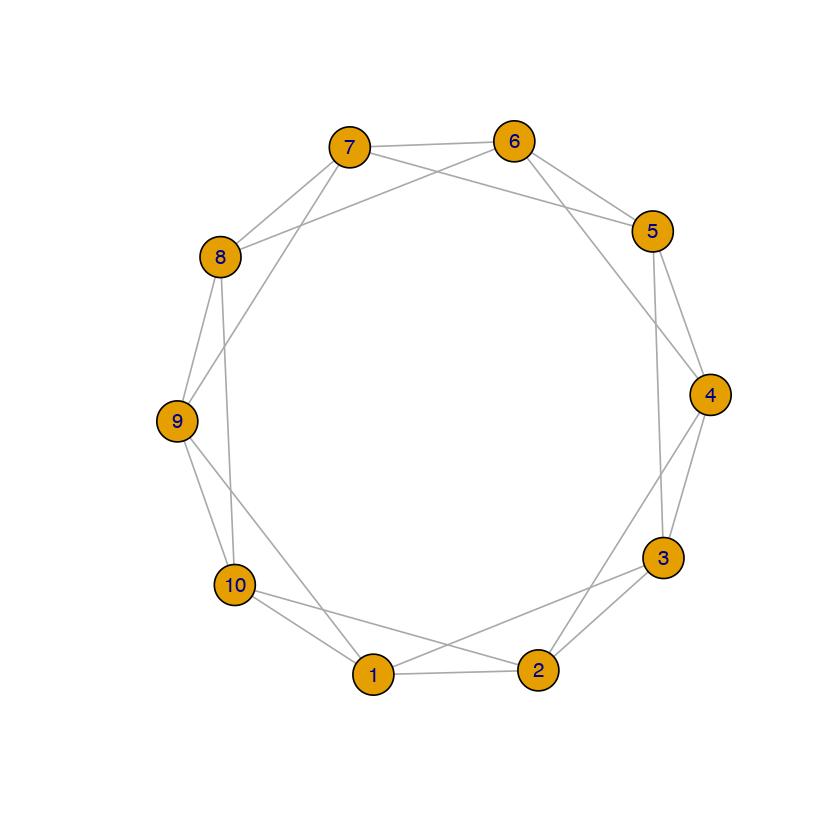

In [31]:
mat <- ring_lattice(N,K)
g <- graph_from_adjacency_matrix(mat, mode="undirected")
plot(g)


<font color='green'>**Exercice 2:** Try to reproduce the exact ring lattice shown in the Watts and Strogatz paper. You can tune the graph visualization using the plot options shown in the following tutorial [blue_text](https://kateto.net/netscix2016.html) (don't spend too much time on this, just give it a quick try; e.g. give some curvature to the links).<font>

In [32]:
# Insert the code for the visualization here




<font color='green'>**Exercice 3:** Calculate the connectance for this graph.<font>

In [33]:
# Insert the code for calculating the connectance here



<font color='green'>_The connectance for the Watts and Strogatz ring lattice is 0.2_<font>



## Randomize ring lattice

Randomizing the ring lattice it's conceptually very easy but a bit tricky to code. Don't worry about the details of how to code this. Instead, try to reread the caption of Figure 1 in the paper, and understand what are the conditions for this randomization process. What is the probability $p$ actually doing? What are the key steps of the process? Discuss this with the members of your group.

You can use the following code to produce a ring lattice that has been randomized by a probability $p$:

In [34]:
p <- 0.01
watts_random <- function(N,K,p){
  d <- diag(N)
  mat <- ring_lattice(N,K) + d
  for (i in 1:K){
    for (j in 1:N){
      if(sample(c(FALSE,TRUE),size = 1, prob = c(1-p,p))){
        idx <- sample(1:(N-1),1)
        k <- (i+j)%%(N+1)
        k <- N*(k==0)+k
        k_ <- (i+j+idx)%%(N+1)
        k_ <- N*(k_==0)+k_
        if(mat[j, k_]==0){
          mat[j,k] <- 0
          mat[k,j] <- 0
          mat[j,k_] <- 1
          mat[k_,j] <- 1          
        }
      }
    }
  }
  mat <- mat-diag(N)
  return(mat)
}


<font color='green'>**Exercice 4:** Will a randomized graph with probability $p$, $N=20$ and $K=6$ have the same connectance as the ring lattice counterpart?<font>

In [35]:
# Insert the code for doing this comparison here:



<font color='green'>**Exercice 5:** Play around with the plot function to see how the graph changes when modifying the probability $p$<font>

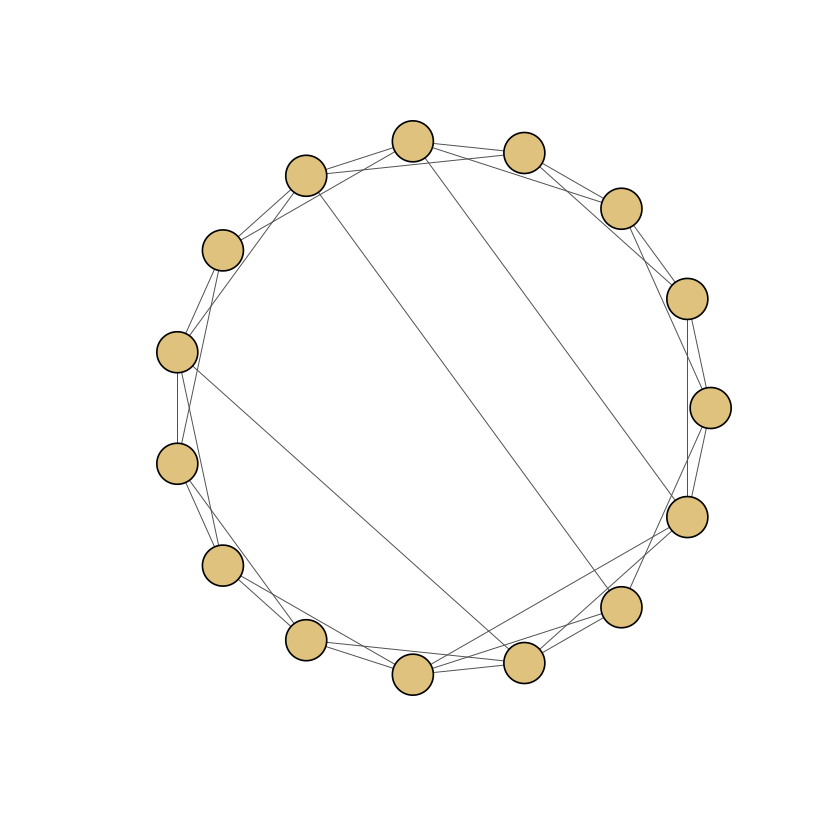

In [36]:
g <- graph_from_adjacency_matrix(watts_random(N=15,K=4,p=0.1), mode="undirected")
plot(g, layout=layout_in_circle(g), edge.color="#525252", edge.width=0.6,
            vertex.color="#dfc27d", edge.curved=0, vertex.label=NA)



## Calculate the clustering coefficient

Watts and Strogatz define the clustering coefficient as follows:
> The clustering coefficient $C(p)$ is defined as follows. Suppose that a vertex $v$ has $k_v$ neighbours; then at most $k_v(k_v-1)/2$ edges can exist between them (this occurs when every neighbour of $v$ is connected to every other neighbour of $v$). Let $C_v$ denote the fraction of these allowable edges that actually exist. Define $C$ as the average of $C_v$ over all $v$. 

We will try to write a piece of code that calculates that step by step.


<font color='green'>**Exercice 6:** We will start by generating a fully random graph with the function 'watts_random()' for $N=20$, $K=4$, and $p=1$. For a given node $idx=1$, try to write a line of code that finds all of its neighbours. You can represent this as a Boolean array.<font>

In [37]:
# Insert the line of code here


```{r}
mat <- watts_random(20,4,1)
idx <- 1
print((mat[idx,]==1 | mat[,idx]==1))
```


<font color='green'>**Exercice 7:** So now we know what the neighbours are for a particular node $idx$. Find the way to generate the adjacency matrix $M$ for all neighbours of $idx$<font>

In [38]:
# Insert the line of code here



```{r}
mat <- watts_random(20,4,1)
idx <- 1
condition <- (mat[idx,]==1 | mat[,idx]==1)
M <- mat[condition,condition]
```


<font color='green'>**Exercice 8:** Use this matrix to calculate the contribution of the node $idx$ to the clustering coefficient.<font>

In [39]:
# Insert the line of code here



```{r}
contribution <- sum(M)/(nrow(M)**2-nrow(M))
```


<font color='green'>**Exercice 9:** Put all the steps together to build a function called 'clust_coeff()' that calculates the clustering coefficient for a given matrix 'mat'. Hint: you will have to loop across all nodes and average the different contributions to the clustering coefficient<font>

In [40]:
# Insert the line of code here



In [41]:
clust_coeff <- function(mat){
  cc <- 0
  for (i in 1:nrow(mat)){
    j <- (mat[i,]==1 | mat[,i]==1)
    k <- sum(j)
    cc <- cc + sum(mat[j,j])/(k**2-k)
  }
  return(cc/nrow(mat))
}



## Calculate the Path length

We won't do this step by step, but we will find online a function that does it for us.


<font color='green'>**Exercice 10:** Try to find online a function online that could do this for the same random graph that we used above. Hint: the "igraph" library that we used to visualize the network has plenty of functions to calculate different network properties, maybe you should try googling that.<font>

In [42]:
# Insert the line of code here



In [43]:
# Since the matrix is a random matrix, your value and my value will most likely be different!
mat <- watts_random(20,4,1)
g <- graph_from_adjacency_matrix(mat, mode="undirected")
average.path.length(g, directed=FALSE, unconnected=FALSE)

[1] 1.710526


## Reproducing Figure 2 from Watts and Strogatz 

To reproduce figure 2 let's first read what are their instructions:
> The figure are averages over 20 random realizations of the rewiring process described in Fig.1, and have been normalized by the values $L(0)$, $C(0)$ for a regular lattice. All the graphs have $N=1000$ vertices and an average degree of $k=10$ edges per vertex. We note that a logarithmic horizontal scale has been used to resolve the rapid drop in $L(p)$, corresponding to the onset of the small-world phenomenon.

The first thing we need to do is define the $x$ axis. This is the randomization probability p, and they choose a logarithmic scale to be able to visualize the "small-world" property

In [44]:
x <- exp(seq(log(0.0001), log(1), length.out = 15))


Now we can randomly generate matrices and calculate the path length and clustering coefficient. Make sure that you've compiled all functions necessary for this. This might take some time, be patient!

In [45]:
N <- 1000
K <- 10
replicates <- 20
results <- c()
for (i in x){
  for (j in 1:replicates){
    rmat <- watts_random(N,K,i)
    g <- graph_from_adjacency_matrix(rmat, mode="undirected")
    results <- rbind(results, c(i,average.path.length(g, directed=FALSE, unconnected=FALSE), clust_coeff(rmat)))
  }
}
results <- data.frame(p=results[,1], l=results[,2], c=results[,3])


Now we just need to average across all probabilities so that for every $p$ we have the average clustering coefficient and path length across replicates the 20 replicates:

In [46]:
dat <- aggregate(results[,2:3], list(results$p), mean)


Now we can calculate the quantities $L(p)/L(0)$ and $C(p)/C(0)$. To do so, we need to calculate L(0) and C(0), and normalize our dataframe.

In [47]:
mat <- watts_random(N,K,0)
g <- graph_from_adjacency_matrix(mat, mode="undirected")

l0 <- average.path.length(g, directed=FALSE, unconnected=FALSE)
c0 <- clust_coeff(mat)

dat$l <- dat$l/l0
dat$c <- dat$c/c0


Finally, let's visualize the results:

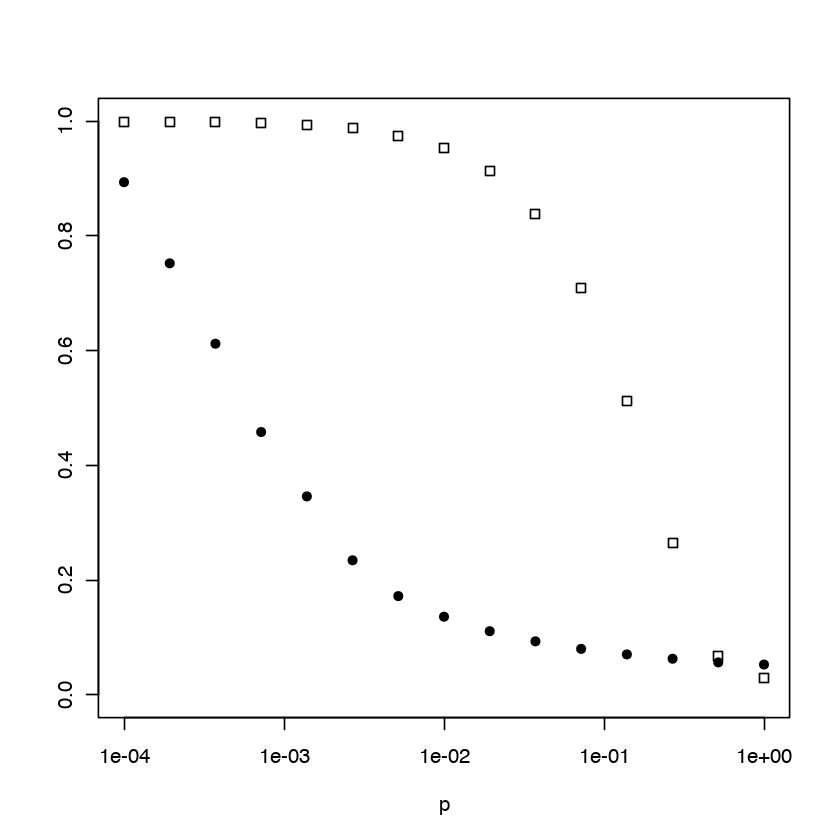

In [48]:
plot(as.numeric(as.character(dat$Group.1)), dat$l, pch=16, type="p", ylim=c(0,1), log="x", ylab = "", xlab = "p")
points(as.numeric(as.character(dat$Group.1)), dat$c, pch=0)

<font color='purple'>Notice that there is a region (a particular range of probabilities), where the clustering coefficient is very high and the path length is very short. The networks falling within such a range of probabilities show small-world features (i.e. high clustering coefficient and short path lengths)!<font>



## Investigate whether or not empirical ecological networks show "small-world" features 

Watts and Strogatz show that some real-world networks present small-world structures. However, they don't look at any ecological network. <font color='red'>**Everyone has to do this part individually in your own computer.** <font>

First, download a food web from a database such as [web of life](http://www.web-of-life.es), [globalwebdb](https://www.globalwebdb.com) or [icon.colorado.edu](https://icon.colorado.edu/#!/networks), and investigate $L$ and $C$. Here, I will show you an example, but you should download your own network and do the same analyses. For the sake of simplicity, we are going to consider all networks undirected.

I will be using the food web with identifier "FW_008" from [web of life](http://www.web-of-life.es). Once you have downloaded the network, you can read it in you R session (you don't need to use this notebook for it). 

In [49]:
mat <- as.matrix(read.table("FW_008.csv", sep=","))

#Since this network is weighted, I will convert the matrix to a binary form and remove any NA:
mat <- 1*(mat>0)
mat[is.na(mat)] <- 0

Let's calculate the number of species and links:

In [50]:
n <- nrow(mat)
k <- sum(mat)

Now let's generate a random matrix with these parameters. You can do this as follows:

In [51]:
rmat <- matrix(sample(c(rep(1,k), rep(0,n*n-k))), n, n)

Calculate the path length and clustering coefficient for both "mat" and "rmat":

In [52]:
#Clustering coefficient
cc_random <- clust_coeff(rmat)
cc_empirical <- clust_coeff(mat)

#Path length
g_random <- graph_from_adjacency_matrix(rmat, mode="undirected")
g_empirical <- graph_from_adjacency_matrix(mat, mode="undirected")
pl_random <- average.path.length(g_random, directed=FALSE, unconnected=FALSE)
pl_empirical <- average.path.length(g_empirical, directed=FALSE, unconnected=FALSE)

print(data.frame(row.names =c("random","empirical"), cc = c(cc_random, cc_empirical), pl=c(pl_random, pl_empirical)))

                  cc       pl
random    0.05831113 1.956795
empirical 0.25631133 1.938690


The network shows similar path length than its random counterpart but much higher clustering coefficient. It's such a small world!!

Fill [this form](https://ee.kobotoolbox.org/x/#kfyNyy1V) to report the results you see regarding your food web. <font color='green'>**Run the code below to see everyone's results:**<font>

In [53]:
library(httr)
rawdata<-httr::GET("https://kc.kobotoolbox.org/api/v1/data/422894")
form_metadata <- httr::content(rawdata)
dat <- sapply(form_metadata, function(x) c(x$What_s_your_name, x$What_s_the_network_identifier,
                                   x$What_s_the_random_path_length, x$What_s_the_measured_path_length,
                                   x$What_s_the_random_clustering_coefficient, x$What_s_the_measured_ustering_coefficient))
print(data.frame(who=dat[1,], network=dat[2,], random.pl=dat[3,], real.pl=dat[4,], random.cc=dat[5,], real.cc=dat[6,]))

            who network random.pl real.pl  random.cc    real.cc
1 Bernat Bramon  FW_008  1.958252 1.93869 0.05776273 0.25631133
